# 4. 데이터 전처리
(1) 데이터
(2) 요약 통계치

In [8]:
import seaborn as sns
import import_ipynb
from Ch1 import features_short, data_ml

c:\Users\82103\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\82103\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\82103\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\82103\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\82103\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.9% of the points

<Axes: xlabel='Factors', ylabel='R1M_Usd'>

c:\Users\82103\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\82103\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\82103\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 23.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\82103\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\82103\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 23.7% of the points

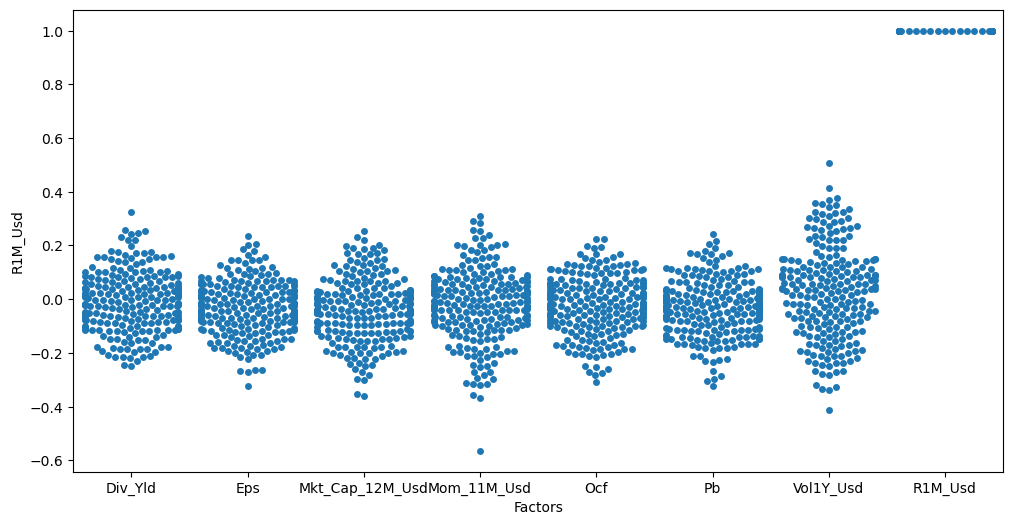

In [9]:
cols=[]
cols=features_short+['R1M_Usd','date']
# 작업할 데이터셋
data_corr=data_ml[cols]
# 상관계수 계산 위한 그룹화
data_corr=data_corr.groupby('date').corr()[['R1M_Usd']].reset_index() #상관관계 표 중 'R1M_Usd'꺼만 보고싶음 # 인덱스: 각 항목
# 레이블에서 correl=1 인스턴스 제거
data_corr=data_corr.loc[data_corr[data_corr.level_1.str[-7:]!='R1M Usd'].index]
data_corr.rename(columns={'level_1':'Factors'},inplace=True)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.swarmplot(x='Factors',y='R1M_Usd',data=data_corr)

KeyboardInterrupt: 

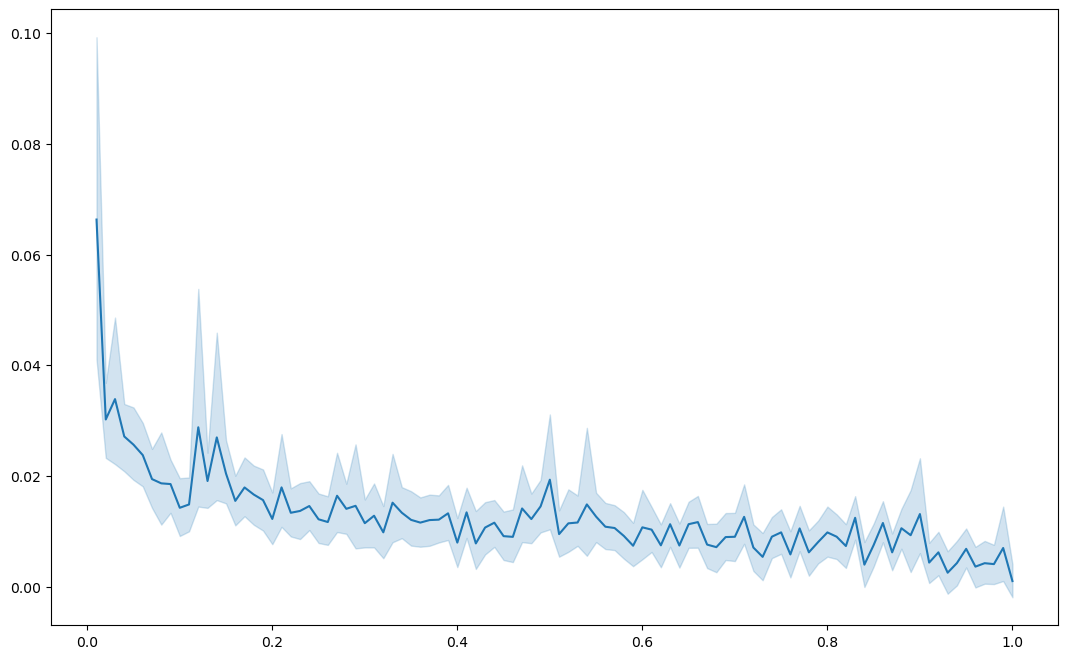

In [10]:
# 조건부 기댓값: 특성에 대한 평활화 함수로서의 평균 수익률
# 백터 선택 및 결합
import pandas as pd
unpivoted_data_ml=pd.melt(data_ml[['R1M_Usd','Mkt_Cap_12M_Usd','Vol1Y_Usd']],id_vars='R1M_Usd')
plt.figure(figsize=(13,8))
sns.lineplot(data=unpivoted_data_ml,y='R1M_Usd',x='value',hue='variable')

c:\Users\82103\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\82103\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\82103\AppData\Local\Temp\ipykernel_5984\1981590394.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_hist_acf=pd.melt(data_ml[cols],id_vars='stock_id').groupby(['stock_id','variable']).apply(lambda x: x['value'].autocorr(lag=1))


<Axes: >

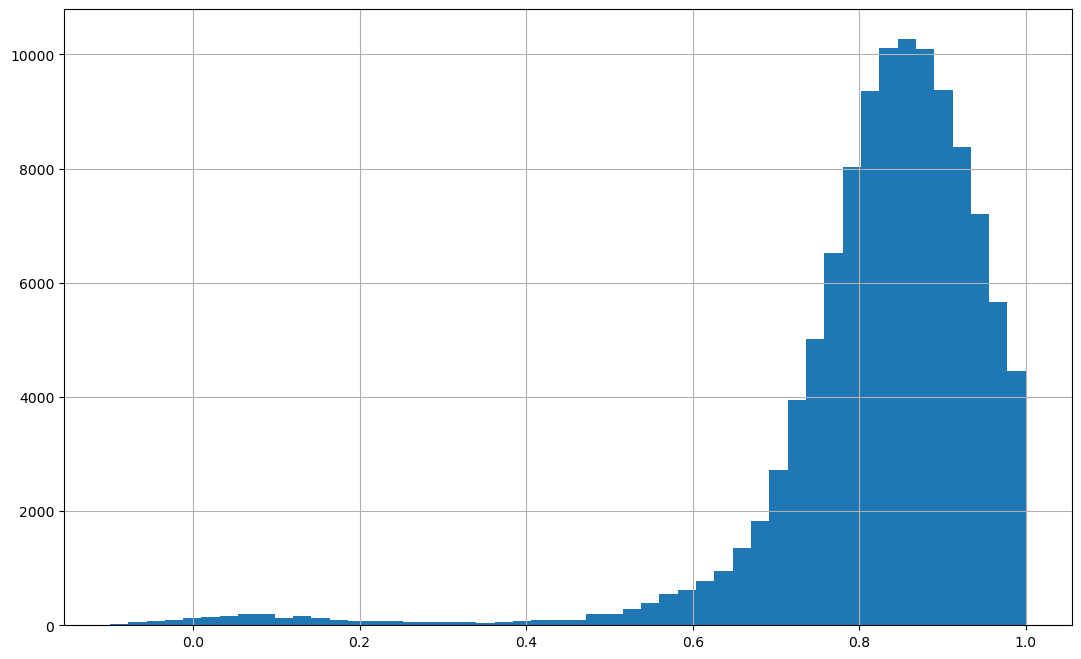

In [ ]:
# 주식 및 특성별로 계산한 자기 상관계수의 히스토그램
cols=[]
cols=['stock_id']+list(data_ml.iloc[:,3:95].columns)
data_hist_acf=pd.melt(data_ml[cols],id_vars='stock_id').groupby(['stock_id','variable']).apply(lambda x: x['value'].autocorr(lag=1))
plt.figure(figsize=(13,8))
data_hist_acf.hist(bins=50,range=[-0.1,1])

[결측 데이터]
(i) 제거 but 리스크 큼
(ii) 대치
- 사용 가능한 과거 값에 대한 주식 특성의 중앙값(or 평균)
- 이전 값 사용 in 백테스팅 고려하는 시계열적 맥락
- 자산들의 횡단면에 대한 중앙값/평균값
- 기본적으로 누락된 수익률 값=0 
- 자기 상관관계 매우 높은 경우 과거값 대입 합리적

[이상치 탐지]
- $[\mu-m\sigma,\mu+m\sigma]$ 벗어나는 모든 데이터를 이상치로 간주
- 가장 큰 값이 두 번째 큰 값의 m배 이상이면 이상치
- 작은 임계치 q에 대해 사분위수 범위 [q,1-q] 벗어나는 모든 값을 이상치로 간주 
$\\ \rarr$ 대충화 by Winsorization
$\\ \overline{x}:\\$ $x_i \ if\  x_i\in [x^{(q)},x^{(1-q)}] \\ x^{(q)}\ if\ x_i< x^{(q)}\\ x^{(1-q)}\ if\ x_i> x^{(1-q)}$
$\\ q$: 일반적으로 (0.5%, 5%)
$\\$ 특성별 & 날짜별로 수행


[특성 공학]
[4.4.1] 특성 선택
- 모든 특성의 상관계수 행렬 계산 - 상관계수 절댓값 < 임계치 확인 ~ 중복 변수가 머신러닝 엔진 오염시키지 않도록
- 선형 회귀 분석 수행해 유의하지 않은 변수 제거
- 특성 집합에 대한 군집화 분석 수행 - 군집 내에서 하나의 특성만 유지
- 다소 환원적 & 비선형 관계 간과 -> 의사결정 트리/변수 중요도 높 유지 등(뒤에서 다룸)

[4.4.2] 예측 인자 스케일링
- 표준화: $\overflow{x}_i=(x_i-m_x)/\sigma_x$
- [0,1] 구간에 대해 최소-최대 리스케일링: $\overflow{x}_i=(x_i-min(x))/(max(x)-min(x))
- [-1,1] 구간에 대해 최소-최대 리스케일링: $\overflow{x}_i=2\frac{x_i-min(x)}{max(x)-min(x)}-1$
- 균등화: $\overflox{x}_i=F_x(x_i)$ ~ F_x: x에 대한 실증적 누적 밀도 함수, 벡터 $\overflow{x}$: [0,1] 구간에 대해 균등 분포 따름
$\\$ (*) 각 날짜 및 각 특성에 대해 개별적으로 작동해야 함 (전체 날짜에 걸쳐 특성 스케일링 X)

[4.5] 레이블링
[4.5.1] 단순 레이블
$\\$ General 레이블 in 팩터 투자
- 자산의 원래 수익률
- 미래 상대 수익률: ex. 수익률 - (횡단면 평균 or 중앙값)
- 양의 수익률이 될 확률
- 주어진 기간 동안 계산한 벤치마크를 상회할 확률
- 위 예시의 이진적 버전: Y / N
- 위 예시의 위험 조정 버전: 샤프 비율, 정보 비율, MAR, CALMAR
$\\$ (*) 수익률 0과 비교 X, t 시점 중앙값(or 평균)과 비교해 수익률을 둘로 나눔(상대적 & 훨씬 더 균형을 이룸) 

$y_{t,i} =
\begin{cases}
-1 & \text{if } \hat{r}_{t,i} < r_{-} \\
0 & \text{if } \hat{r}_{t,i} \in [r_{-}, r_{+}] \\
1 & \text{if } \hat{r}_{t,i} > r_{+}
\end{cases}$
- 수익률 대용치: 수익률 or 샤프 비율

[4.5.3] 트리플 배리어 기법
- 자산의 현재 수준보다 높은 자홍색 선 (+1)
- 자산의 현재 수준보다 낮은 청록색 선 (-1)
- 전략 종료 검은색 선 (0)

[4.5.5] 수익률의 시간적 구간
- 레이블의 기간
- 추정 윈도우
- 보유 기간

[4.6] 특성과 레이블 간의 지속성
- 레이블(미래 성과)과 특성 사이의 자기 상관관계 패턴: 너무 멀리 떨어져 있지 않아야 함
if 레이블(월별 수익률): AC 낮 / 특성: 높
(i) 레이블에 AC 입히기 by 긴 시간 범위
(ii) 특성의 AC 제거 by  Differencing

[4.7.1] 특성 변환
- 새 변수: $\breve{x}^{k}_{t,n}=x^{(k)}_{t-1,n}$
- or $\breve{x}^{(k)}_{t,n}=x^{(k)}_{t,n}-x^{(k)}_{t-1,n}$ 

[4.7.2] 거시경제 변수
- 동적 임계치 설정: $r_{t,\pm}=r_{\pm}\times e^{\pm\delta(VIX_t-\overline{VIX})}$

[4.7.3] 능동학습
- 쿼리(Query)라고 불리는 필터 사용해 어떤 데이터에 레이블을 지정하고 학습할지 결정
- 레이블링: 오라클이 수행(사람)

[4.8] 추가 코드 및 결과

([<matplotlib.axis.XTick at 0x250a58cbed0>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

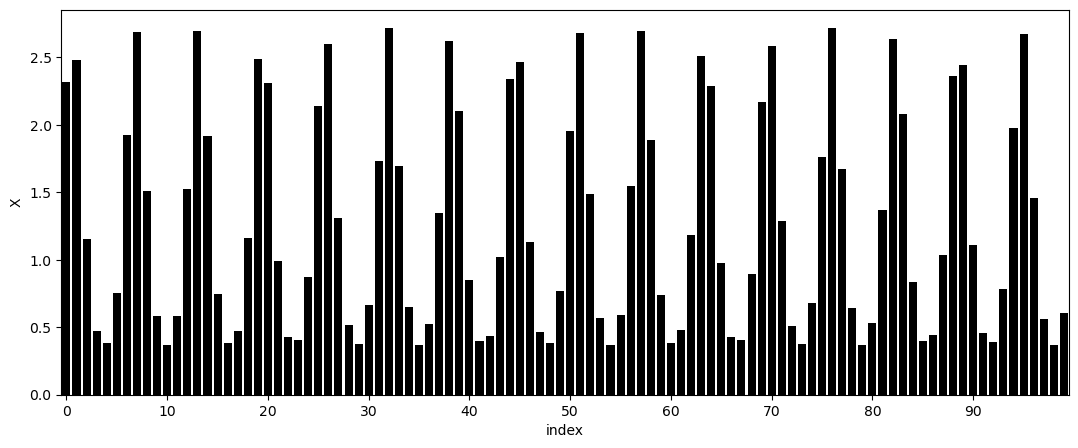

In [15]:
# 4.8.1 리스케일링 효과: 시각적 표현
import numpy as np
import pandas as pd
length=100
# linspace : 1~length까지 숫자를 length개만큼 같은 간격으로 만들기
# 시간 흐름에 sin함수 씌움 -> exponential: 모양 변환
x=np.exp(np.sin(np.linspace(1,length,length)))
data=pd.DataFrame(data=x,columns=['X'])
data.reset_index(inplace=True) # index를 column으로 빼옴
plt.figure(figsize=(13,5))
sns.barplot(y="X",data=data,x='index',color='black')
plt.xticks(data['index'][::10]) # 10개 관측치 단위로 x축 눈금 재조정

([<matplotlib.axis.XTick at 0x2509dfbad50>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

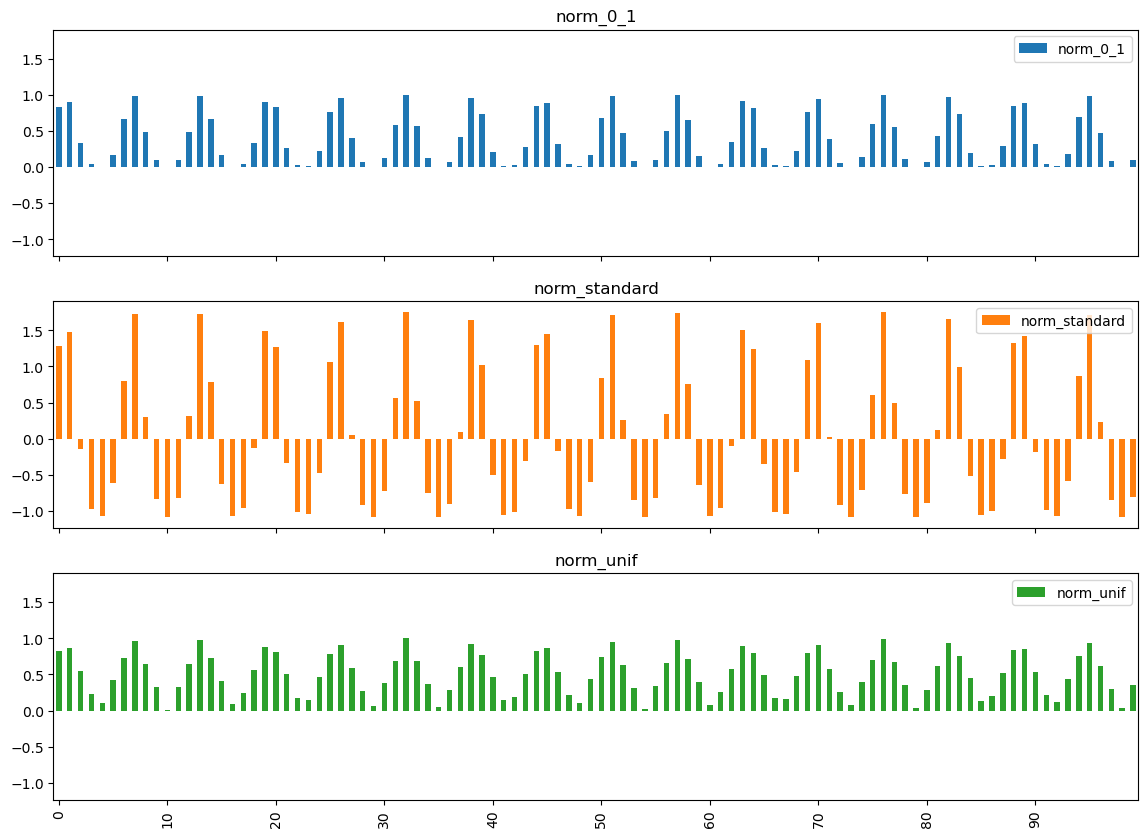

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
# ECDF 내장 함수 사용
def norm_0_1(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))
def norm_unif(x):
    return (ECDF(x)(x)) # ECDF(x): 데이터 x의 순서 & 분포 기억하는 변환기 반환
def norm_standard(x):
    return (x-np.mean(x))/np.std(x)

# numpy 배열을 딕셔너리로 -> 그 후 Pandas DataFrame으로
data_norm=pd.DataFrame.from_dict(dict(index=np.linspace(1,length,length), # 인덱스
                                      norm_0_1=norm_0_1(x), # 정규화
                                      norm_standard=norm_standard(x), # 표준화
                                      norm_unif=norm_unif(x))) # 균등화
data_norm.iloc[:,1:4].plot.bar(figsize=(14,10), subplots=True, sharey=True, sharex=True)
plt.xticks(data['index'][::10]) # 열개 단위로 x축 눈금 재조정


<Axes: ylabel='Frequency'>

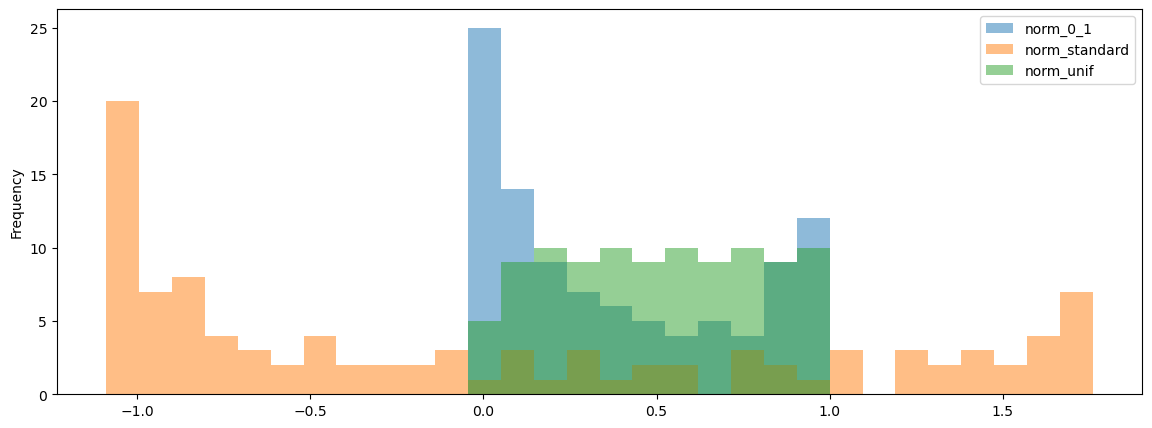

In [17]:
data_norm.iloc[:,1:4].plot.hist(alpha=0.5, bins=30, figsize=(14,5))

In [18]:
# 리스케일링 효과: 토이 예시
from IPython.display import display, Markdown
cap=np.array([10,50,100, # 시가총액
              15,10,15,
              200,120,80])
returns=np.array([0.06,0.01,-0.06,
                  -0.03,0.00,0.02,
                  -0.04,-0.02,0.00])
date=np.array([1,2,3,1,2,3,1,2,3])
firm=np.array([1,1,1,2,2,2,3,3,3])
toy_data=pd.DataFrame.from_dict(dict(firm=firm, date=date, cap=cap, returns=returns, cap_norm=norm_0_1(cap), cap_u=norm_unif(cap)))
display(Markdown(toy_data.to_markdown()))

|    |   firm |   date |   cap |   returns |   cap_norm |    cap_u |
|---:|-------:|-------:|------:|----------:|-----------:|---------:|
|  0 |      1 |      1 |    10 |      0.06 |  0         | 0.222222 |
|  1 |      1 |      2 |    50 |      0.01 |  0.210526  | 0.555556 |
|  2 |      1 |      3 |   100 |     -0.06 |  0.473684  | 0.777778 |
|  3 |      2 |      1 |    15 |     -0.03 |  0.0263158 | 0.444444 |
|  4 |      2 |      2 |    10 |      0    |  0         | 0.222222 |
|  5 |      2 |      3 |    15 |      0.02 |  0.0263158 | 0.444444 |
|  6 |      3 |      1 |   200 |     -0.04 |  1         | 1        |
|  7 |      3 |      2 |   120 |     -0.02 |  0.578947  | 0.888889 |
|  8 |      3 |      3 |    80 |      0    |  0.368421  | 0.666667 |

In [19]:
# 회귀 분석
import statsmodels.api as sm
X=toy_data.cap_norm.to_numpy()
X=sm.add_constant(X)
model=sm.OLS(returns, X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     4.265
Date:                    목, 08 1 2026   Prob (F-statistic):             0.0778
Time:                        14:56:23   Log-Likelihood:                 19.892
No. Observations:                   9   AIC:                            -35.78
Df Residuals:                       7   BIC:                            -35.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0124      0.014      0.912      0.3

In [20]:
X=toy_data.cap_u.to_numpy()
X=sm.add_constant(X)
model=sm.OLS(returns, X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     6.672
Date:                    목, 08 1 2026   Prob (F-statistic):             0.0363
Time:                        14:56:52   Log-Likelihood:                 20.764
No. Observations:                   9   AIC:                            -37.53
Df Residuals:                       7   BIC:                            -37.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0457      0.022      2.056      0.0